In [178]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [179]:
data = pd.read_csv("Heart.csv")
print(data.head(4).T)

                  0             1             2           3
Unnamed: 0        1             2             3           4
Age              63            67            67          37
Sex               1             1             1           1
ChestPain   typical  asymptomatic  asymptomatic  nonanginal
RestBP          145           160           120         130
Chol            233           286           229         250
Fbs               1             0             0           0
RestECG           2             2             2           0
MaxHR           150           108           129         187
ExAng             0             1             1           0
Oldpeak         2.3           1.5           2.6         3.5
Slope             3             2             2           3
Ca                0             3             2           0
Thal          fixed        normal    reversable      normal
AHD              No           Yes           Yes          No


In [180]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [182]:
data.rename(columns= {'Unnamed: 0':"Serial No."})

,Serial No.,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [183]:
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [184]:
data.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Analysis

In [185]:
data.head(5)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


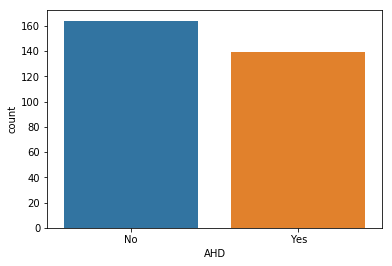

In [186]:
sns.countplot(x = 'AHD', data=data)

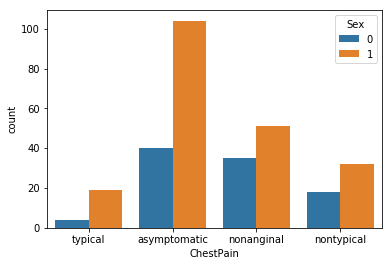

In [187]:
sns.countplot(x= 'ChestPain', hue='Sex' , data=data)

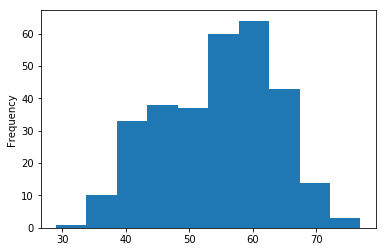

In [188]:
data["Age"].plot.hist()

# Data Wrangling or Data Cleaning

In [189]:
data.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [190]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

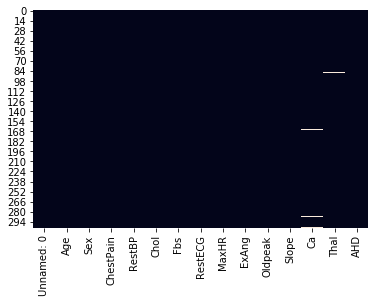

In [191]:
sns.heatmap(data.isnull(), cbar=False)

In [192]:
data.dropna(inplace=True)

In [193]:
data.drop("Ca", axis = 1, inplace=True)

In [194]:
data.drop("Thal", axis = 1, inplace=True)

In [195]:
data.head(5)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,No


In [196]:
data.drop("Unnamed: 0", axis = 1, inplace=True)

In [197]:
data.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,No


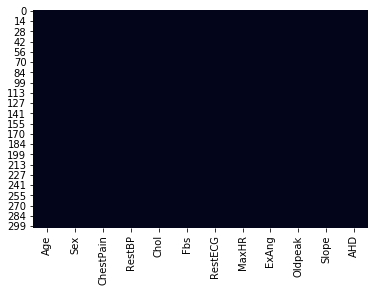

In [198]:
sns.heatmap(data.isnull(), cbar=False)

In [199]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
AHD          0
dtype: int64

In [200]:
data.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,No


In [201]:
AHD = pd.get_dummies(data['AHD'],drop_first=True)
AHD.head(5)

,Yes
0,0
1,1
2,1
3,0
4,0


In [202]:
cp = pd.get_dummies(data['ChestPain'],drop_first=True)
cp.head(5)

,nonanginal,nontypical,typical
0,0,0,1
1,0,0,0
2,0,0,0
3,1,0,0
4,0,1,0


In [203]:
data = pd.concat([data,AHD,cp], axis=1)

In [204]:
data.drop(['AHD','ChestPain'], axis=1,inplace=True)

In [205]:
data.head(5)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Yes,nonanginal,nontypical,typical
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,2,1,0,0,0
2,67,1,120,229,0,2,129,1,2.6,2,1,0,0,0
3,37,1,130,250,0,0,187,0,3.5,3,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,1,0


# Train Data

In [206]:
X = data.drop('Yes', axis=1)
y = data['Yes']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [208]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
predictions = logmodel.predict(X_test)

In [210]:
from sklearn.metrics import classification_report

In [211]:
classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.72      0.79      0.75        48\n          1       0.73      0.64      0.68        42\n\navg / total       0.72      0.72      0.72        90\n'

In [212]:
from sklearn.metrics import confusion_matrix

In [213]:
confusion_matrix(y_test, predictions)

array([[38, 10],
       [15, 27]])

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

72.222222222222214